In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [2]:
img = image.load_img(r"C:\Users\aksha\Desktop\name prediction\basedata\train\Lemon\0010_0002.jpg")

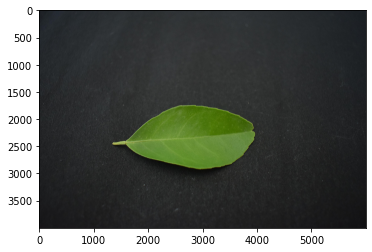

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Users\aksha\Desktop\name prediction\basedata\train\Lemon\0010_0002.jpg").shape

(4000, 6000, 3)

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
train_dataset = train.flow_from_directory(r'C:\Users\aksha\Desktop\name prediction\basedata\train',
                                         target_size = (200,200),
                                         batch_size = 128,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory(r'C:\Users\aksha\Desktop\name prediction\basedata\validation',
                                         target_size = (200,200),
                                         batch_size = 128,
                                         class_mode = 'binary')

Found 329 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'Lemon': 0, 'Mango': 1}

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             #
                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             #
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             ##
                             tf.keras.layers.Flatten(),
                             ##
                             tf.keras.layers.Dense(512,activation = 'relu'),
                             ##
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
                             ])
    






In [9]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [10]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 30,
                     validation_data = validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 3 steps
Epoch 1/30
3/3 [==============================] - 179s 60s/step - loss: 2.6173 - accuracy: 0.4985 - val_loss: 0.6807 - val_accuracy: 0.4833
Epoch 2/30
3/3 [==============================] - 177s 59s/step - loss: 0.5196 - accuracy: 0.7751 - val_loss: 0.6027 - val_accuracy: 0.5714
Epoch 3/30
3/3 [==============================] - 179s 60s/step - loss: 1.5948 - accuracy: 0.6413 - val_loss: 0.3108 - val_accuracy: 0.9696
Epoch 4/30
3/3 [==============================] - 179s 60s/step - loss: 0.2530 - accuracy: 0.9666 - val_loss: 0.1958 - val_accuracy: 0.9392
Epoch 5/30
3/3 [==============================] - 179s 60s/step - loss: 0.3156 - accuracy: 0.8571 - val_loss: 0.1695 - val_accuracy: 0.9666
Epoch 6/30
3/3 [==============================] - 179s 60s/step - loss: 0.1241 - accuracy: 0.9726 - val_loss: 0.0637 - val_accuracy: 0.9818
Epoch 7/30
3/3 [==============================] - 189s 63s/step - loss

In [11]:
validation_dataset.class_indices

{'Lemon': 0, 'Mango': 1}

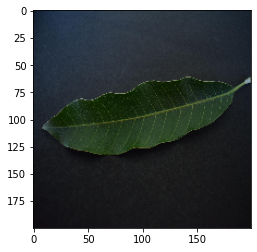

lemon


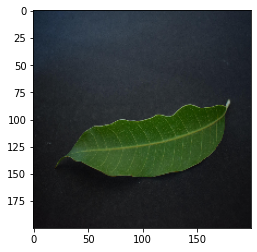

lemon


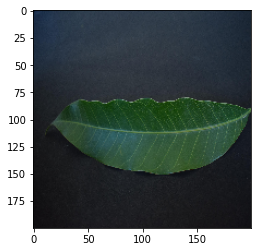

mango


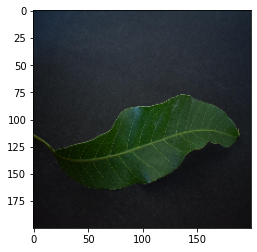

lemon


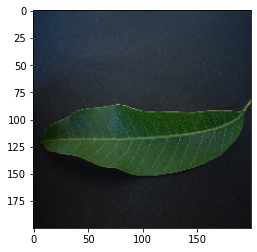

lemon


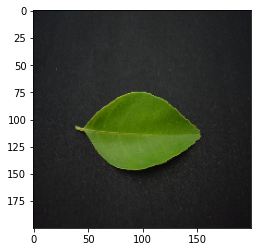

lemon


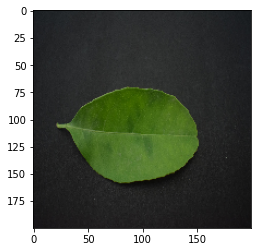

lemon


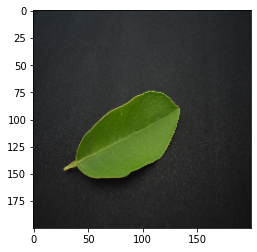

lemon


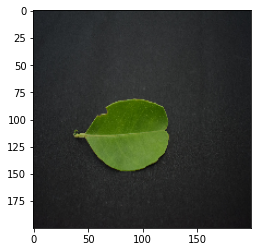

lemon


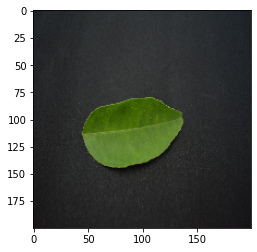

lemon


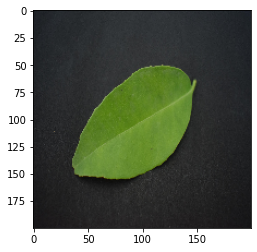

lemon


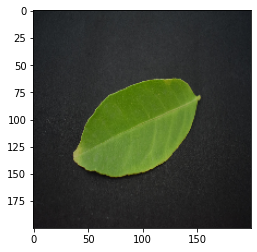

lemon


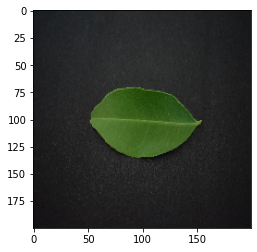

lemon


In [13]:
dir_path = r"C:\Users\aksha\Desktop\name prediction\basedata\test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("lemon")
    else:
        print("mango")
    
    
    

